In [1]:
# 필요한 라이브러리 import하기

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing 
import seaborn as sns 
import optuna 
import lightgbm as lgb 
from sklearn.metrics import accuracy_score, roc_auc_score,precision_score, confusion_matrix,recall_score
from sklearn.model_selection import cross_val_score, train_test_split
import os 
# Data Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

/dshome/WoongLab/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# 데이터 불러오기

df=pd.read_csv('/dshome/WoongLab/heo/construction_oil/breastcancer/BreastCancer.csv')

In [3]:
df.head(5)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [4]:
# 데이터 결측치 확인하기
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [5]:
print(df.shape)
print(df.dtypes)

(4024, 16)
Age                        int64
Race                      object
Marital Status            object
T Stage                   object
N Stage                   object
6th Stage                 object
differentiate             object
Grade                     object
A Stage                   object
Tumor Size                 int64
Estrogen Status           object
Progesterone Status       object
Regional Node Examined     int64
Reginol Node Positive      int64
Survival Months            int64
Status                    object
dtype: object


In [6]:
# 데이터 각 피처의 요약통계량 확인하기

df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


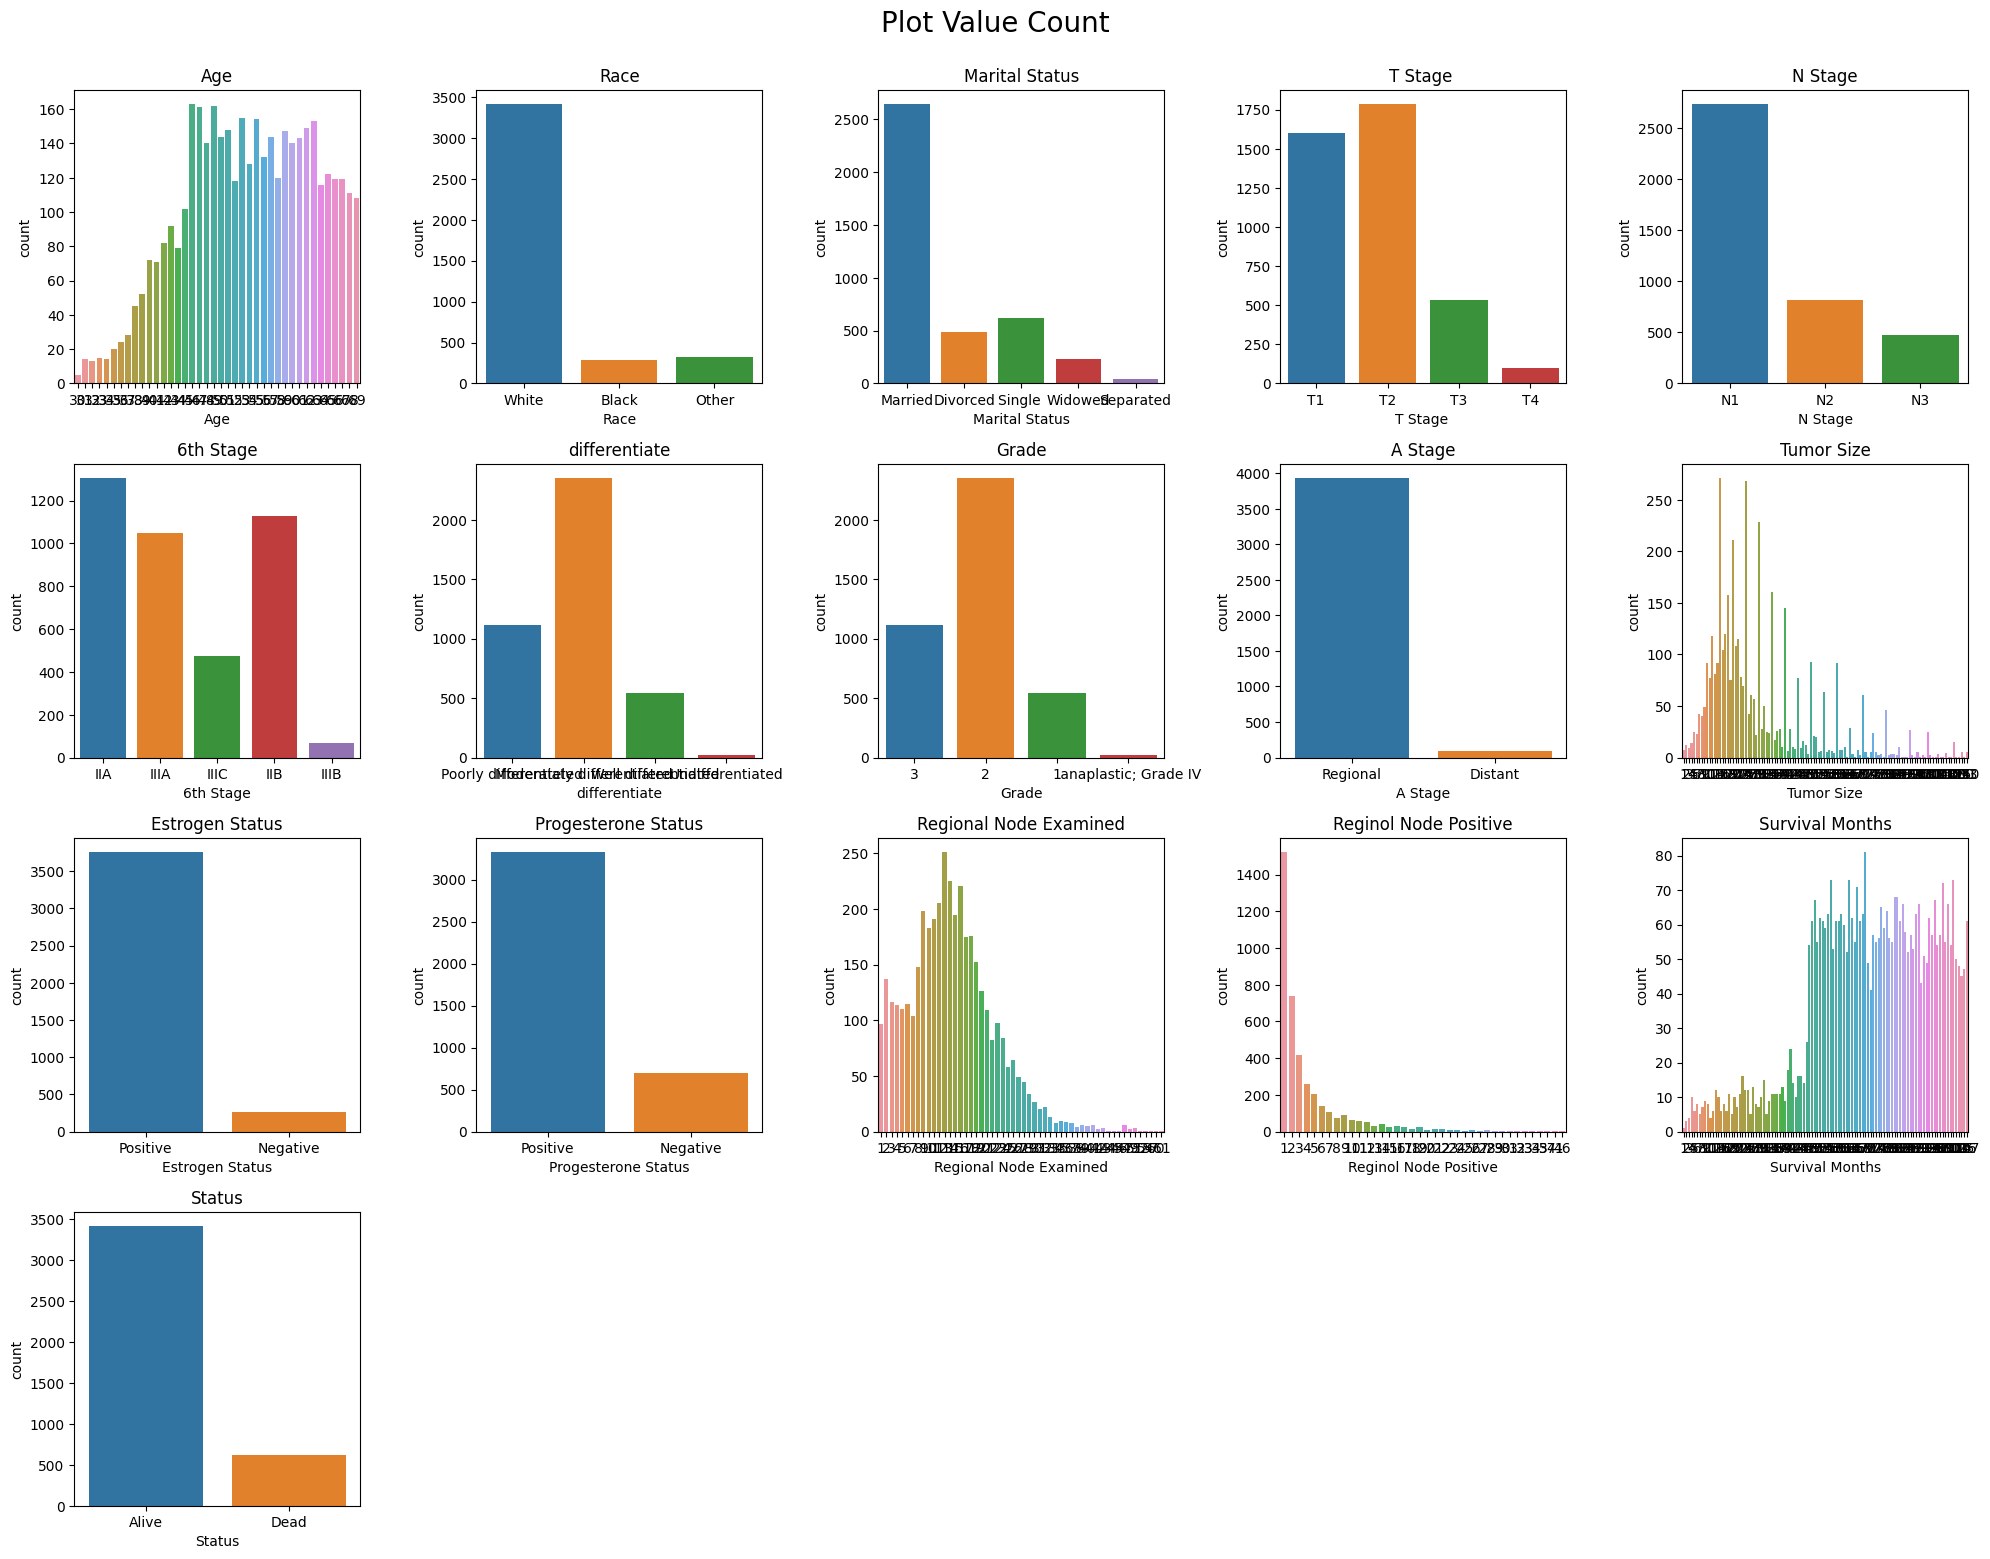

In [7]:
# Countplot on each feature
plt.figure(figsize=(20,60))
for i,column in enumerate(df.columns):
    plt.subplot(len(df.columns), 5, i+1)
    plt.suptitle("Plot Value Count", fontsize=20, x=0.5, y=1)
    sns.countplot(data=df, x=column)
    plt.title(f"{column}")
    plt.tight_layout()

/tmp/ipykernel_193871/2303282355.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True, cmap='BrBG');


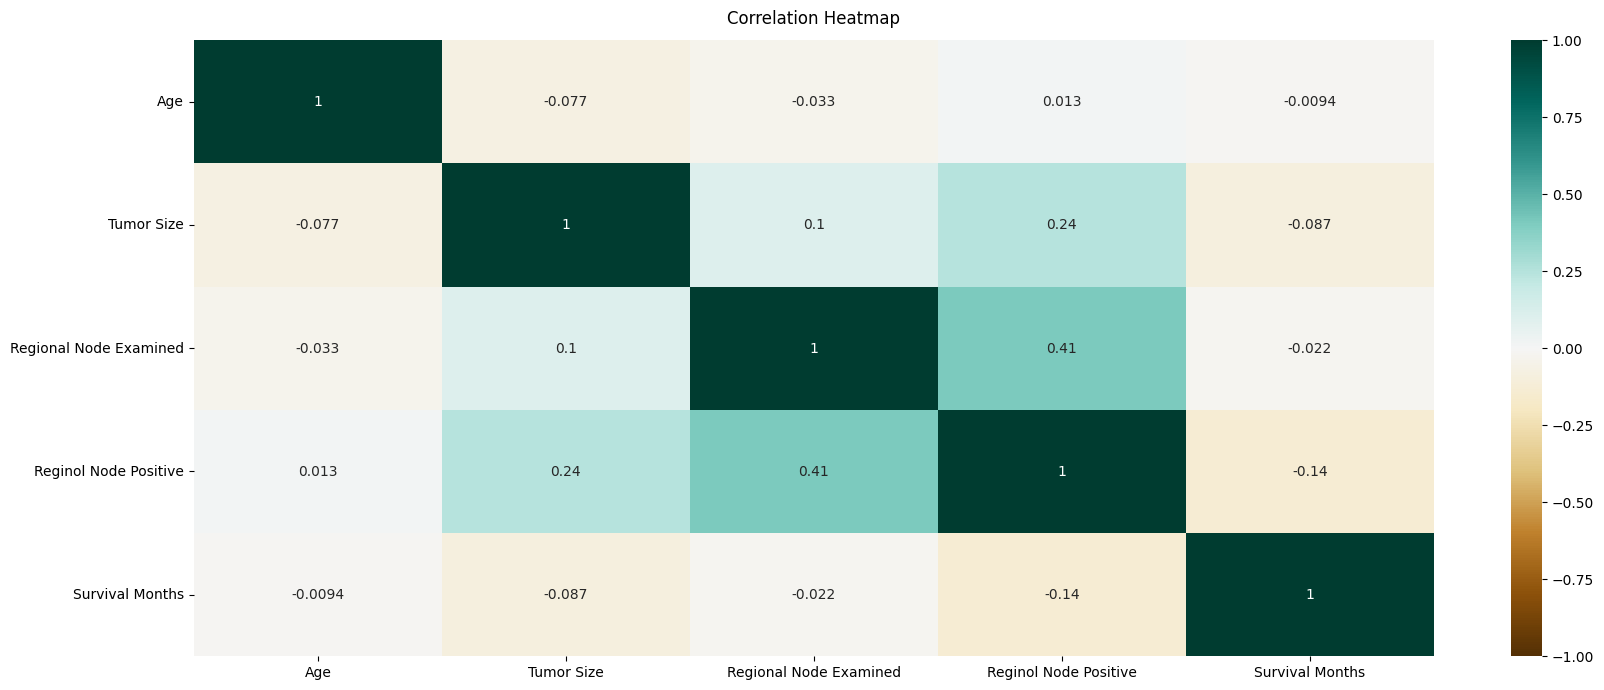

In [8]:
# Explore corrleations between features

plt.figure(figsize=(20,8))
heatmap = sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True, cmap='BrBG');
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [10]:
# 문자형 변수를 LabelEncoder()함수를 이용하여 

encoder = LabelEncoder()
def encodeColumn(parameter):
    df[parameter] = encoder.fit_transform(df[parameter])

# Run Function
listColumn = ['Race','Marital Status','T Stage ','N Stage','6th Stage','differentiate','Grade','A Stage','Estrogen Status','Progesterone Status','Status']
for i in listColumn:
    encodeColumn(i)

In [11]:
# 데이터의 독립변수와 

all_X=df.drop(['Status'],axis=1) 
all_y=df['Status']
all_y

0       0
1       0
2       0
3       0
4       0
       ..
4019    0
4020    0
4021    0
4022    0
4023    0
Name: Status, Length: 4024, dtype: int64

In [12]:
# 변수 중요도를 구하기 위해 RandomForestClassifier 함수 구하기

forest = RandomForestClassifier(random_state=42,max_depth=10)

In [13]:
# 모델 학습하기

forest.fit(all_X,all_y)

RandomForestClassifier(max_depth=10, random_state=42)

In [14]:
# 변수 중요도를 계산합니다.

importances=forest.feature_importances_

In [15]:
# 변수 중요도가 높은 것부터 차례로 정렬합니다.

indices=np.argsort(importances)[::-1]

In [16]:
# 

print("Feature ranking:")
for f in range(all_X.shape[1]):
    print("%d. %s (%f)" % (f + 1, all_X.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. Survival Months (0.477867)
2. Age (0.087324)
3. Reginol Node Positive (0.073733)
4. Tumor Size (0.073640)
5. Regional Node Examined (0.064893)
6. 6th Stage (0.034740)
7. N Stage (0.032479)
8. Marital Status (0.029300)
9. Progesterone Status (0.026242)
10. Estrogen Status (0.022088)
11. Grade (0.021449)
12. T Stage  (0.019488)
13. Race (0.016251)
14. differentiate (0.015416)
15. A Stage (0.005090)


In [35]:
train_X, test_X, train_y, test_y = train_test_split(all_X, all_y, test_size=0.2, random_state=42, stratify=all_y)

In [36]:
train_data=pd.concat([train_X,train_y],axis=1)
test_data=pd.concat([test_X,test_y],axis=1)

In [37]:
train_data.to_csv('/dshome/WoongLab/heo/construction_oil/preprocessed_data/breastcancer_train_data.csv',index=False)

test_data.to_csv('/dshome/WoongLab/heo/construction_oil/preprocessed_data/breastcancer_test_data.csv',index=False)